In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
real_test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")

In [6]:
train_data.groupby('Survived')['Pclass']

In [19]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [361]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [362]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [363]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


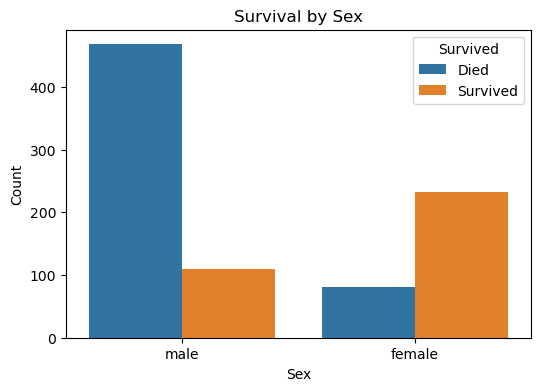

In [364]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()


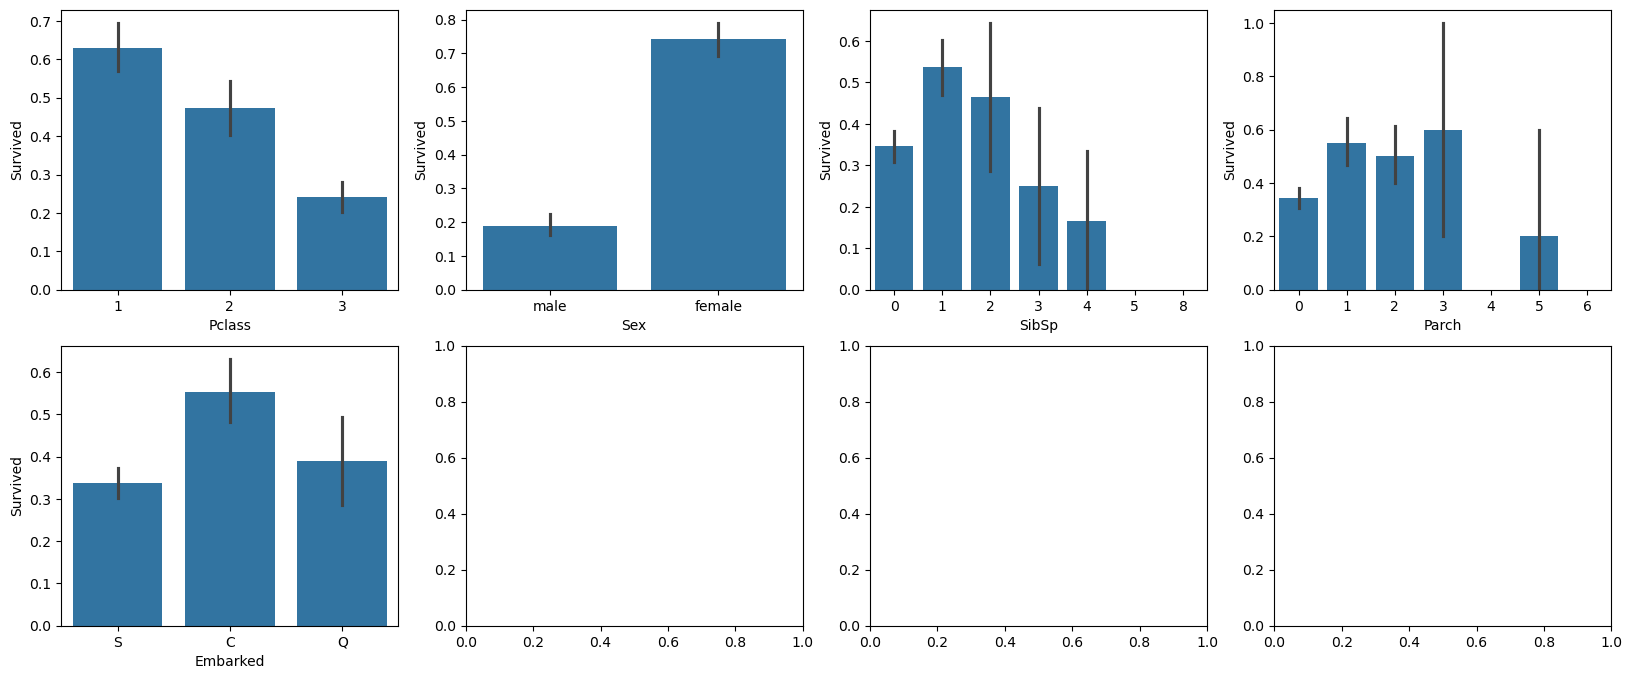

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

cate = ['Pclass', 'Sex','SibSp','Parch', 'Embarked']

data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")

fig, axs = plt.subplots(figsize=(20, 8), ncols=4, nrows=2)

for i, feature in enumerate(cate):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='Survived', data=data, ax=axs[row][col])

plt.show() 

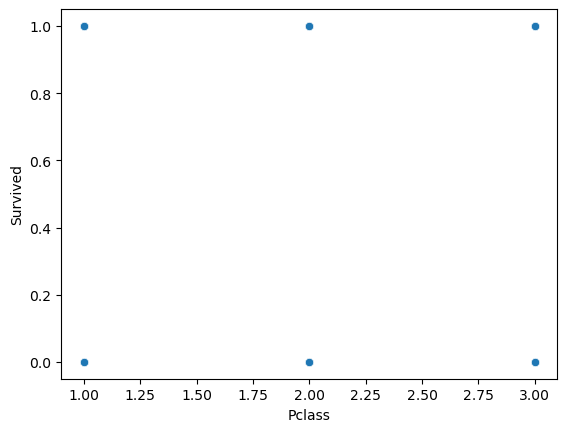

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연속형 데이터 'feature'와 이진 타겟 변수 'target'을 사용
sns.scatterplot(x='Pclass', y='Survived', data= data)
plt.show()

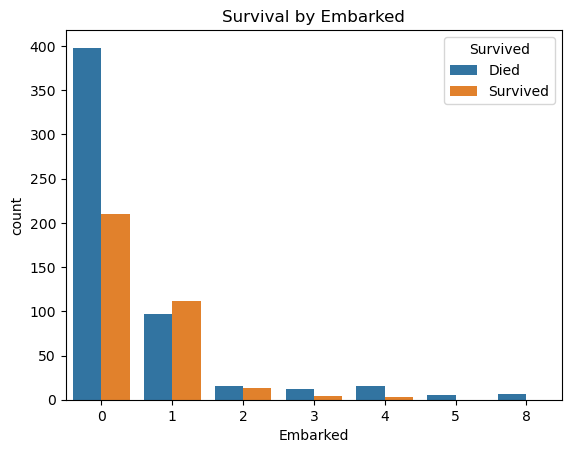

In [4]:
import seaborn as sns

sns.countplot(x='SibSp',hue ='Survived', data = train_data)
plt.title('Survival by Embarked')
plt.xlabel('Embarked')
plt.ylabel('count')
plt.legend(title ='Survived', labels =['Died','Survived'])
plt.show()

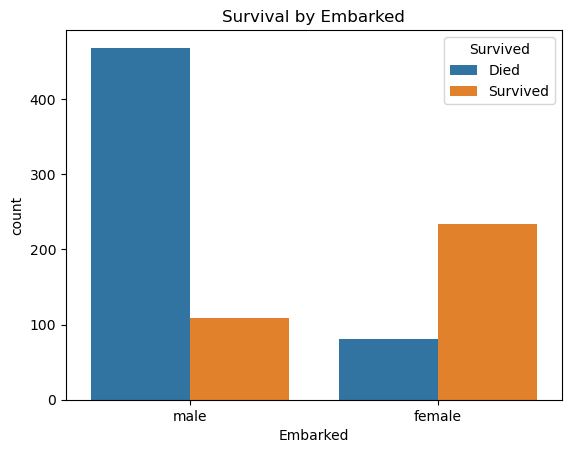

In [21]:
import seaborn as sns

sns.countplot(x='Sex',hue ='Survived', data = train_data)
plt.title('Survival by Embarked')
plt.xlabel('Embarked')
plt.ylabel('count')
plt.legend(title ='Survived', labels =['Died','Survived'])
plt.show()

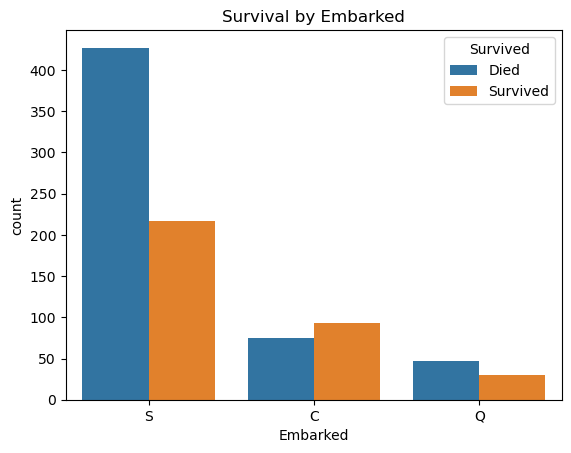

In [365]:
sns.countplot(x='Embarked', hue = 'Survived', data = train_data)
plt.title('Survival by Embarked')
plt.xlabel('Embarked')
plt.ylabel('count')
plt.legend(title ='Survived', labels =['Died','Survived'])
plt.show()

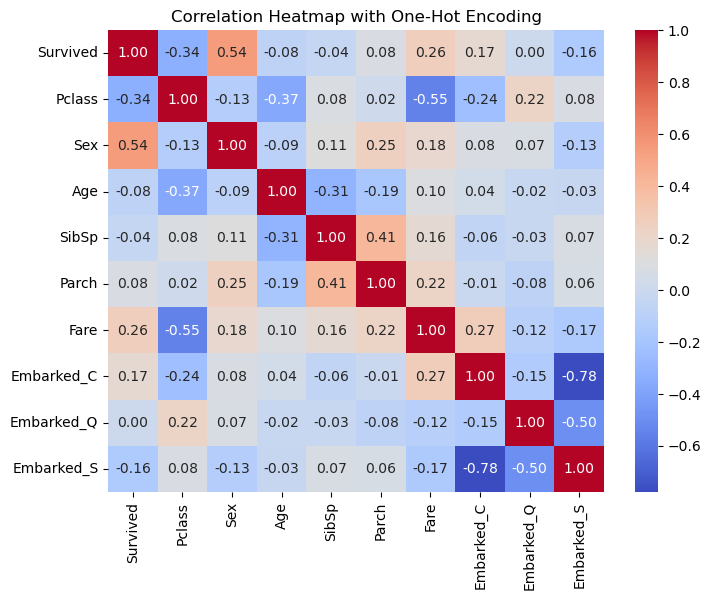

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
train = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")

# 필요 없는 열 제거
train.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

# 성별을 숫자로 변환 (male: 0, female: 1)
train['Sex'] = np.where(train['Sex'] == 'male', 0, 1)

# One-Hot Encoding으로 Embarked 열 변환
train = pd.get_dummies(train, columns=['Embarked'])

# 상관관계 계산
corr = train.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with One-Hot Encoding')
plt.show()


In [678]:
train_data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
real_test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")

# real_test의 결측치 처리 
real_test = real_test.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked', 'SibSp', 'Parch', 'Age'], axis = 1) # Pclass, Sex, Fare 채택

# train_data의 결측치 처리 
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked', 'SibSp', 'Parch', 'Age'], axis = 1) # Pclass, Sex, Fare 채택

# train 정답지 분리
train_labels = train_data['Survived'] 

train_data = train_data.drop('Survived', axis = 1) 

# M, F 정수형으로 변환 
train_data['Sex'] = np.where(train_data['Sex'] == 'male', 0, 1)

real_test['Sex'] = np.where(real_test['Sex'] == 'male', 0, 1)

train_X, test_X, train_y, test_y = train_test_split(train_data, train_labels, test_size=0.2)

rdf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 8, min_samples_split= 8, n_estimators= 100)

rdf.fit(train_X,train_y)

predicted = rdf.predict(test_X)

ac = accuracy_score(test_y, predicted)

print(predicted, ac)

a = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\gender_submission.csv")

real_prec = rdf.predict(real_test)

a['Survived']= real_prec

a.to_csv('tanic.csv', index=False)

[1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0] 0.7988826815642458


In [662]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(train_X , train_y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7992


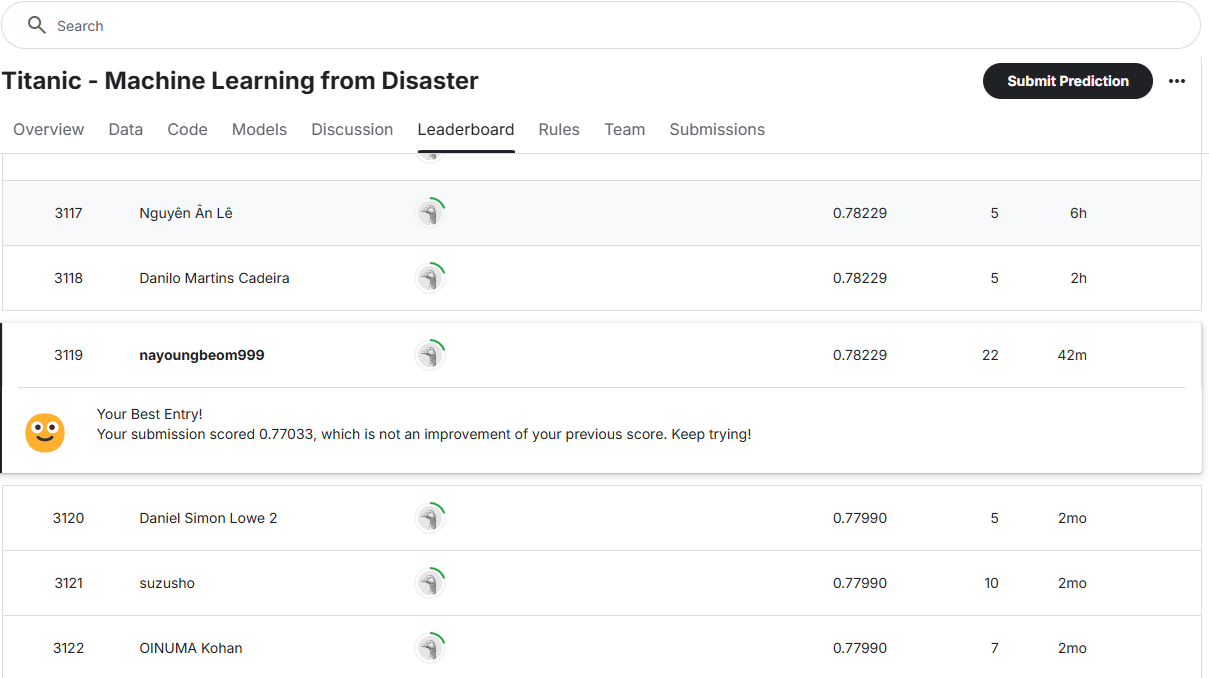

In [ ]:
from IPython.display import display, Image

img = r"C:\Users\302-28\Desktop\제목 없음.png"

display(Image(filename=img))

밑의 코드는 무시바랍니다.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
real_test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")
y = data['Survived'] 

# real_test의 특성 처리 
real_test = real_test.drop(['PassengerId','Name','Ticket','Cabin', 'SibSp', 'Parch', 'Age'], axis = 1) # Pclass, Sex, Fare 채택

# train_data의 특성 및 결측치 처리 
data = data.drop(['PassengerId','Name','Ticket','Cabin', 'SibSp', 'Parch','Age','Survived'], axis = 1) # Pclass, Sex, Fare 채택

ohencoder = OneHotEncoder(sparse_output=False)
ohencoder.fit(data[['Embarked']])

train_encoder = ohencoder.transform(data[['Embarked']])
test_encoder = ohencoder.transform(real_test[['Embarked']])

train_encoder_df = pd.DataFrame(train_encoder, columns=ohencoder.get_feature_names_out())
test_encoder_df = pd.DataFrame(test_encoder, columns=ohencoder.get_feature_names_out())

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
real_test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")
y = data['Survived'] 

# real_test의 특성 처리 
real_test = real_test.drop(['PassengerId','Name','Ticket','Cabin', 'SibSp', 'Parch', 'Age'], axis = 1) # Pclass, Sex, Fare 채택

# train_data의 특성 및 결측치 처리 
data = data.drop(['PassengerId','Name','Ticket','Cabin', 'SibSp', 'Parch','Age','Survived'], axis = 1) # Pclass, Sex, Fare 채택

ohencoder = OneHotEncoder(sparse_output=False)
ohencoder.fit(data[['Embarked']])

train_encoder = ohencoder.transform(data[['Embarked']])
test_encoder = ohencoder.transform(real_test[['Embarked']])

train_encoder_df = pd.DataFrame(train_encoder, columns=ohencoder.get_feature_names_out())
test_encoder_df = pd.DataFrame(test_encoder, columns=ohencoder.get_feature_names_out())

train_df = pd.concat([data.drop(columns='Embarked').reset_index(drop=True), train_encoder_df], axis=1)
test_df = pd.concat([real_test.drop(columns='Embarked').reset_index(drop=True), test_encoder_df], axis=1)

# M, F 정수형으로 변환 
train_df['Sex'] = np.where(train_df['Sex'] == 'male', 0, 1)

test_df['Sex'] = np.where(test_df['Sex'] == 'male', 0, 1)

rdf = RandomForestClassifier(max_depth= 8, min_samples_leaf= 8, min_samples_split= 20, n_estimators= 100)

cv_scores = cross_val_score(rdf, train_df, y, cv=5)

rdf.fit(train_df,y)

a = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\gender_submission.csv")

real_prec = rdf.predict(test_df)

a['Survived']= real_prec

a.to_csv('tanic_cv.csv', index=False)

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(train_X , train_y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.7949


밑의 코드는 Age 특성 추가 채택

In [4]:
train_data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
real_test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")

# real_test의 결측치 처리 
real_test = real_test.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1) # Pclass, Sex, Fare, Age 채택

# train_data의 결측치 처리 
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1) # Pclass, Sex, Fare, Age 채택
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# train 정답지 분리
train_labels = train_data['Survived'] 

train_data = train_data.drop('Survived', axis = 1) 

# M, F 정수형으로 변환 
train_data['Sex'] = np.where(train_data['Sex'] == 'male', 0, 1)

real_test['Sex'] = np.where(real_test['Sex'] == 'male', 0, 1)

train_X, test_X, train_y, test_y = train_test_split(train_data, train_labels, test_size=0.2)

rdf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 8, min_samples_split= 8, n_estimators= 100)

rdf.fit(train_X,train_y)

predicted = rdf.predict(test_X)

ac = accuracy_score(test_y, predicted)

print(predicted, ac)

a = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\gender_submission.csv")

real_prec = rdf.predict(real_test)

a['Survived']= real_prec

a.to_csv('tanic_age.csv', index=False)

[1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1] 0.8324022346368715


밑의 코드는 Age, Embarked 특성 추가 채택 

In [5]:
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
real_test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")

encoder = LabelEncoder()
train_data['Embarked'] = encoder.fit_transform(train_data['Embarked'])

# real_test의 결측치 처리 
real_test = real_test.drop(['PassengerId','Name','Ticket','Cabin', 'SibSp', 'Parch'], axis = 1) # Pclass, Sex, Fare, Age, Embarked 채택
real_test['Embarked'] = encoder.transform(real_test['Embarked'])

# train_data의 결측치 처리 
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin', 'SibSp', 'Parch'], axis = 1) # Pclass, Sex, Fare, Age, Embarked 채택
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# train 정답지 분리 
train_labels = train_data['Survived'] 

train_data = train_data.drop('Survived', axis = 1) 

# M, F 정수형으로 변환 
train_data['Sex'] = np.where(train_data['Sex'] == 'male', 0, 1)

real_test['Sex'] = np.where(real_test['Sex'] == 'male', 0, 1)

train_X, test_X, train_y, test_y = train_test_split(train_data, train_labels, test_size=0.2)

rdf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 8, min_samples_split= 8, n_estimators= 100)

rdf.fit(train_X,train_y)

predicted = rdf.predict(test_X)

ac = accuracy_score(test_y, predicted)

print(predicted, ac)

a = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\gender_submission.csv")

real_prec = rdf.predict(real_test)

a['Survived']= real_prec

a.to_csv('tanic_age_embarked.csv', index=False)

[1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0] 0.8044692737430168


cv + age 추가 

In [17]:
from sklearn.model_selection import cross_val_score

train_data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
real_test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")

encoder = LabelEncoder()

# train_data의 특성 및 결측치 처리 
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin', 'SibSp', 'Parch', 'Age'], axis = 1) # Pclass, Sex, Fare 채택
train_data['Embarked'] = encoder.fit_transform(train_data['Embarked'])

# real_test의 특성 처리 
real_test = real_test.drop(['PassengerId','Name','Ticket','Cabin', 'SibSp', 'Parch', 'Age'], axis = 1) # Pclass, Sex, Fare 채택
real_test['Embarked'] = encoder.transform(real_test['Embarked'])

# train 문제 및 정답지 분리
train_labels = train_data['Survived'] 

train_data = train_data.drop('Survived', axis = 1) 

# M, F 정수형으로 변환 
train_data['Sex'] = np.where(train_data['Sex'] == 'male', 0, 1)

real_test['Sex'] = np.where(real_test['Sex'] == 'male', 0, 1)

rdf = RandomForestClassifier(max_depth= 8, min_samples_leaf= 8, min_samples_split= 20, n_estimators= 100)

cv_scores = cross_val_score(rdf, train_data, train_labels, cv=5)

rdf.fit(train_data,train_labels)

print(cv_scores, np.mean(cv_scores))

a = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\gender_submission.csv")

real_prec = rdf.predict(real_test)

a['Survived']= real_prec

a.to_csv('tanic_cv_em.csv', index=False)

[0.78212291 0.79213483 0.83707865 0.79213483 0.82022472] 0.8047391877471597


In [ ]:
from sklearn.model_selection import cross_val_score

train_data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
real_test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")

# real_test의 특성 처리 
real_test = real_test.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1) # Pclass, Sex, Fare 채택

# train_data의 특성 및 결측치 처리 
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1) # Pclass, Sex, Fare 채택
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# train 문제 및 정답지 분리
train_labels = train_data['Survived'] 

train_data = train_data.drop('Survived', axis = 1) 

# M, F 정수형으로 변환 
train_data['Sex'] = np.where(train_data['Sex'] == 'male', 0, 1)

real_test['Sex'] = np.where(real_test['Sex'] == 'male', 0, 1)

rdf = RandomForestClassifier(max_depth= 8, min_samples_leaf= 8, min_samples_split= 8, n_estimators= 100)

cv_scores = cross_val_score(rdf, train_data, train_labels, cv=5)

rdf.fit(train_data,train_labels)

print(cv_scores, np.mean(cv_scores))

a = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\gender_submission.csv")

real_prec = rdf.predict(real_test)

a['Survived']= real_prec

a.to_csv('tanic_cv_age.csv', index=False)

In [14]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

data = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\train.csv")
test = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\test.csv")

X = data[['Pclass', 'Fare', 'Sex']]
y = data['Survived']
test = test[['Pclass', 'Fare', 'Sex']]

X = pd.get_dummies(X, columns=['Sex'])
test = pd.get_dummies(test, columns=['Sex'])

xgb = XGBClassifier(learning_rate= 0.05, max_depth= 7, n_estimators= 200, subsample= 1.0)

corss_score = cross_val_score(xgb, X, y, cv = 5)

xgb.fit(X, y)

result = xgb.predict(test)

a = pd.read_csv(r"C:\Users\302-28\Desktop\titanic\gender_submission.csv")

a['Survived'] = result

a.to_csv('atarashi.csv', index= False)

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 수
    'learning_rate': [0.01, 0.05, 0.1],  # 학습률
    'max_depth': [3, 5, 7],  # 트리 깊이
    'subsample': [0.8, 0.9, 1.0]  # 데이터 샘플링 비율
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# 그리드 서치 실행
grid_search.fit(X, y)

# 최적의 파라미터 출력
print("최적의 파라미터:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
최적의 파라미터: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [11]:
X.head()

,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,7.2500,False,True,False,False,True
1,71.2833,True,False,True,False,False
2,7.9250,True,False,False,False,True
3,53.1000,True,False,True,False,False
4,8.0500,False,True,False,False,True
